<h2>Categorical Variables and One Hot Encoding</h2>

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [39]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [40]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [41]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [42]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [43]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [44]:
y = final.price

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(X,y)

LinearRegression()

In [47]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [48]:
model.score(X,y)

0.9573929037221873

In [49]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [50]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

<h2 style='color:purple'>Using sklearn OneHotEncoder</h2>

First step is to use label encoder to convert town names into numbers

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [53]:
X = dfle[['town','area']].values

In [54]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [55]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

Now use one hot encoder to create dummy variables for each of the town

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [57]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [58]:
X = X[:,1:]

In [59]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [60]:
model.fit(X,y)

LinearRegression()

In [61]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [62]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

<h2 style='color:green'>Exercise</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [63]:
df = pd.read_csv('carprices.csv')

In [64]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [66]:
encoded_df = pd.get_dummies(df, columns=['Car Model'])
encoded_df

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False
2,57000,26100,5,False,True,False
3,22500,40000,2,False,True,False
4,46000,31500,4,False,True,False
5,59000,29400,5,True,False,False
6,52000,32000,5,True,False,False
7,72000,19300,6,True,False,False
8,91000,12000,8,True,False,False
9,67000,22000,6,False,False,True


In [67]:
encoded_df['price'] = encoded_df['Sell Price($)']
encoded_df.pop('Sell Price($)')
encoded_df

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class,price
0,69000,6,False,True,False,18000
1,35000,3,False,True,False,34000
2,57000,5,False,True,False,26100
3,22500,2,False,True,False,40000
4,46000,4,False,True,False,31500
5,59000,5,True,False,False,29400
6,52000,5,True,False,False,32000
7,72000,6,True,False,False,19300
8,91000,8,True,False,False,12000
9,67000,6,False,False,True,22000


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

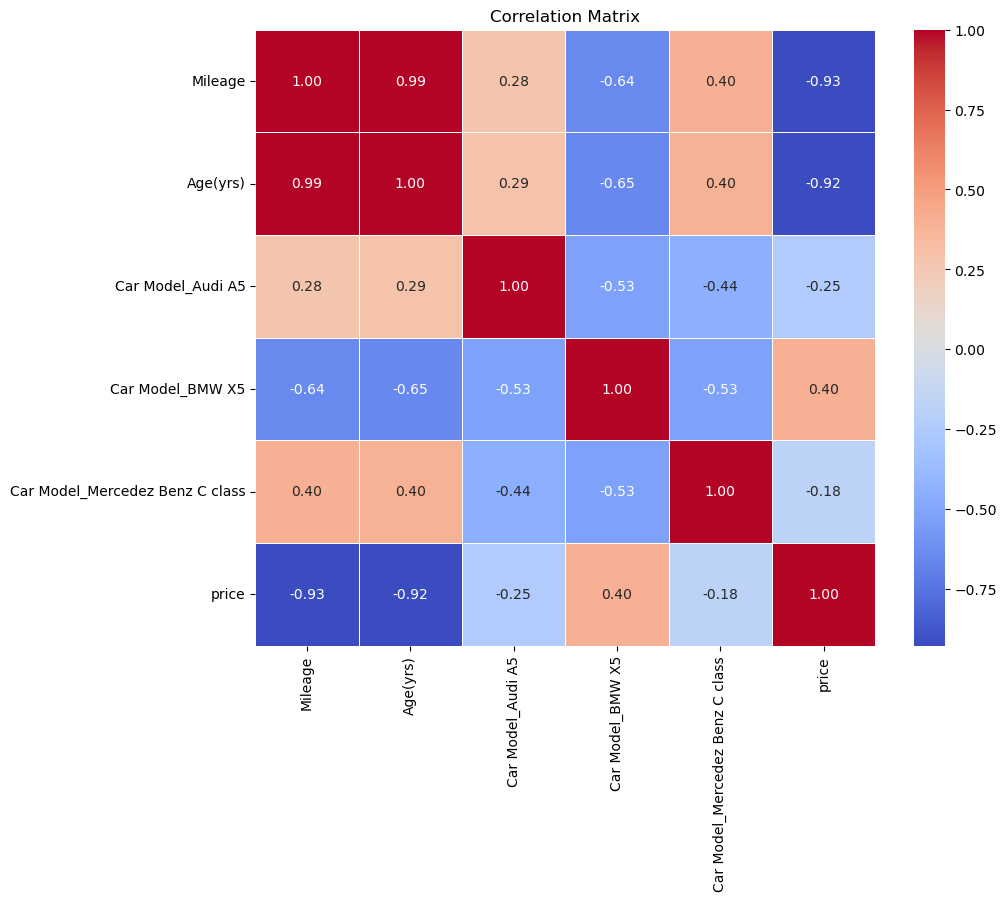

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()
model.fit(encoded_df.drop(columns = ['price']),encoded_df.price)

LinearRegression()

In [74]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03,  6.10375284e+02, -3.67429130e+03,
        3.06391602e+03])

Mileage,	Age(yrs),	Car Model_Audi A5,	Car Model_BMW X5,	Car Model_Mercedez Benz C class	

In [77]:
def predict_price(mileage, age, car_model):
    Audi_A5 = 0
    BMW_X5 = 0
    Mercedez_Benz = 0
    if car_model == 'Audi_A5': Audi_A5 = 1
    if car_model == 'BMW_X5': BMW_X5 = 1
    if car_model == 'Mercedez_Benz': Mercedez_Benz = 1
    price = model.intercept_ + mileage*model.coef_[0] + age*model.coef_[1]+Audi_A5*model.coef_[2] + BMW_X5*model.coef_[3] + Mercedez_Benz*model.coef_[4]
    return price

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

In [78]:
predict_price(45000,4, 'Audi_A5')

34537.776473350554

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**


In [79]:
predict_price(86000,7, 'BMW_X5')

11080.743132190646

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [73]:
model.score(encoded_df.drop(columns = ['price']),encoded_df.price)

0.9417050937281082